
Task 1 - Load Data
Read in the data to pandas
Check the shape of the dataframe
Check the summary statistics of the dataframe
Change the row index to the "Year" column

In [80]:
import pandas as pd
import numpy as np

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)
bang = pd.read_csv("https://raw.githubusercontent.com/k2datascience/ds-foundations/master/code/bangalore_temparature.tsv", sep = "\t")
bang.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,23.094,24.243,25.398,27.740,26.328,24.735,23.969,24.154,25.097,24.301,23.090,21.000
1,1902,21.588,22.930,26.277,27.442,27.118,25.477,24.428,25.019,23.940,23.759,22.790,22.184
2,1903,22.296,23.969,26.552,27.764,26.718,25.132,24.004,23.958,23.925,23.587,21.693,20.727
3,1904,20.982,22.623,25.636,27.510,25.878,23.714,23.278,24.032,24.408,24.185,22.214,21.119
4,1905,21.740,24.158,26.095,26.977,26.863,25.271,24.453,24.444,24.476,24.007,23.029,21.372


In [24]:
bang.shape
bang.info()
bang= bang.set_index("Year")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
Year    102 non-null int64
Jan     102 non-null float64
Feb     102 non-null float64
Mar     102 non-null float64
Apr     102 non-null float64
May     102 non-null float64
Jun     102 non-null float64
Jul     102 non-null float64
Aug     102 non-null float64
Sep     102 non-null float64
Oct     102 non-null float64
Nov     102 non-null float64
Dec     102 non-null float64
dtypes: float64(12), int64(1)
memory usage: 10.4 KB


Task 2 - Initial Data Analysis¶
(Chart) How does temperature vary over the year (X-axis is months)?
(Chart) How does temperature vary over the years (X-axis is years)?
Which months had the highest and lowest temperatures in 1960?
What were the highest, lowest and mean values in 1960?
Where were the highest, lowest and mean values in an arbitray year (hint: write a function)?
Which months had the highest and lowest gains in temperature?
Make a histogram, KDE plot and bar plot of the gains.

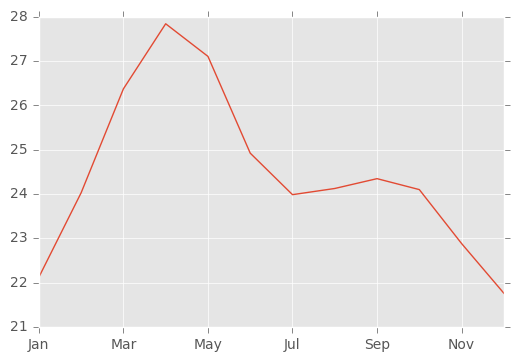

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib; matplotlib.style.use('ggplot')

bang.mean().plot()

In [28]:
bang_tran= bang.T
bang_tran

Year,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,23.094,21.588,22.296,20.982,21.740,22.935,21.529,21.974,22.070,22.083,...,22.218,22.504,22.372,22.982,22.614,23.530,22.705,23.174,23.196,23.349
Feb,24.243,22.930,23.969,22.623,24.158,24.680,23.739,23.289,23.860,23.578,...,24.155,24.586,24.975,24.345,24.661,25.724,24.466,25.028,26.063,24.130
Mar,25.398,26.277,26.552,25.636,26.095,25.505,25.841,25.262,26.425,26.377,...,26.692,26.980,26.471,27.077,26.584,27.917,27.490,26.542,27.427,27.284
Apr,27.740,27.442,27.764,27.510,26.977,28.822,26.807,28.201,27.133,28.064,...,28.203,27.738,28.069,27.685,26.850,28.908,27.890,28.090,28.128,28.559
May,26.328,27.118,26.718,25.878,26.863,28.272,26.550,26.575,26.177,27.479,...,27.816,27.685,26.253,28.268,27.599,28.075,25.822,26.859,27.404,27.501
Jun,24.735,25.477,25.132,23.714,25.271,25.006,24.536,25.321,24.895,24.948,...,25.299,25.072,25.948,25.045,26.427,26.259,24.771,24.388,25.160,25.285
Jul,23.969,24.428,24.004,23.278,24.453,24.021,23.977,23.338,23.555,24.271,...,24.277,23.752,24.167,24.578,24.837,24.553,24.242,24.063,24.729,24.931
Aug,24.154,25.019,23.958,24.032,24.444,23.919,23.375,23.840,24.212,23.583,...,24.456,24.586,24.607,24.171,24.521,24.761,24.562,24.067,24.162,24.718
Sep,25.097,23.940,23.925,24.408,24.476,23.341,24.518,24.347,23.640,23.189,...,24.127,24.820,24.732,24.443,25.207,24.589,25.224,24.906,25.323,25.869
Oct,24.301,23.759,23.587,24.185,24.007,23.897,24.394,24.336,24.232,23.695,...,24.201,24.273,24.523,24.139,24.902,24.509,24.696,24.339,24.208,25.093


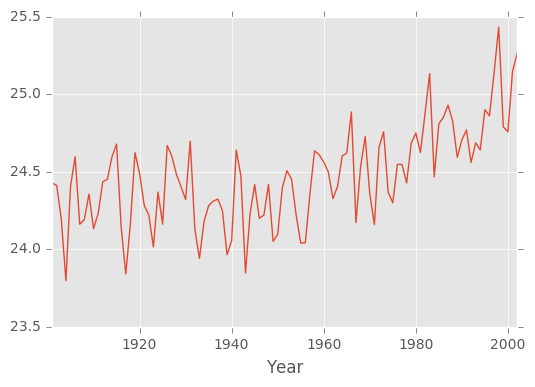

In [30]:
bang_tran.mean().plot()

In [36]:
bang_tran[1960].max()

28.141999999999999

In [38]:
print(bang_tran[1960].idxmax())
print(bang_tran[1960].idxmin())

Apr
Dec


In [44]:
def find_high_low_mean(year):
    print(" The high was",  bang_tran[year].max()," in:",bang_tran[year].idxmax(), "of:", year)
    print(" The low was",bang_tran[year].max(), " in:",bang_tran[year].idxmin(), "of:", year)
    print(" And the mean was: ",bang_tran[year].mean())
find_high_low_mean(1960)    

 The high was 28.142  in: Apr of: 1960
 The low was 28.142  in: Dec of: 1960
 And the mean was:  24.564083333333333


In [62]:
temp_1901 = bang_tran[1901]
temp_2002 = bang_tran[2002]
bang_tran['difference_temp'] = (bang_tran[2002]-bang_tran[1901])
bang_tran['difference_temp'].order()


/Users/dancardella/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


Feb   -0.113
Jan    0.255
Jun    0.550
Aug    0.564
Nov    0.580
Sep    0.772
Oct    0.792
Apr    0.819
Jul    0.962
May    1.173
Dec    1.776
Mar    1.886
Name: difference_temp, dtype: float64

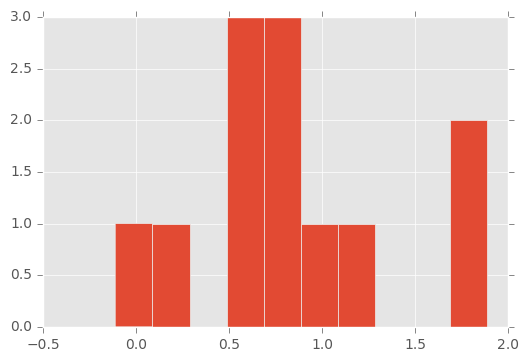

In [65]:
bang_tran['difference_temp'].hist()

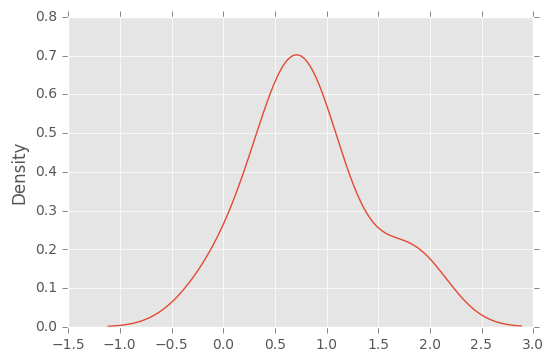

In [66]:
bang_tran['difference_temp'].plot(kind='kde')

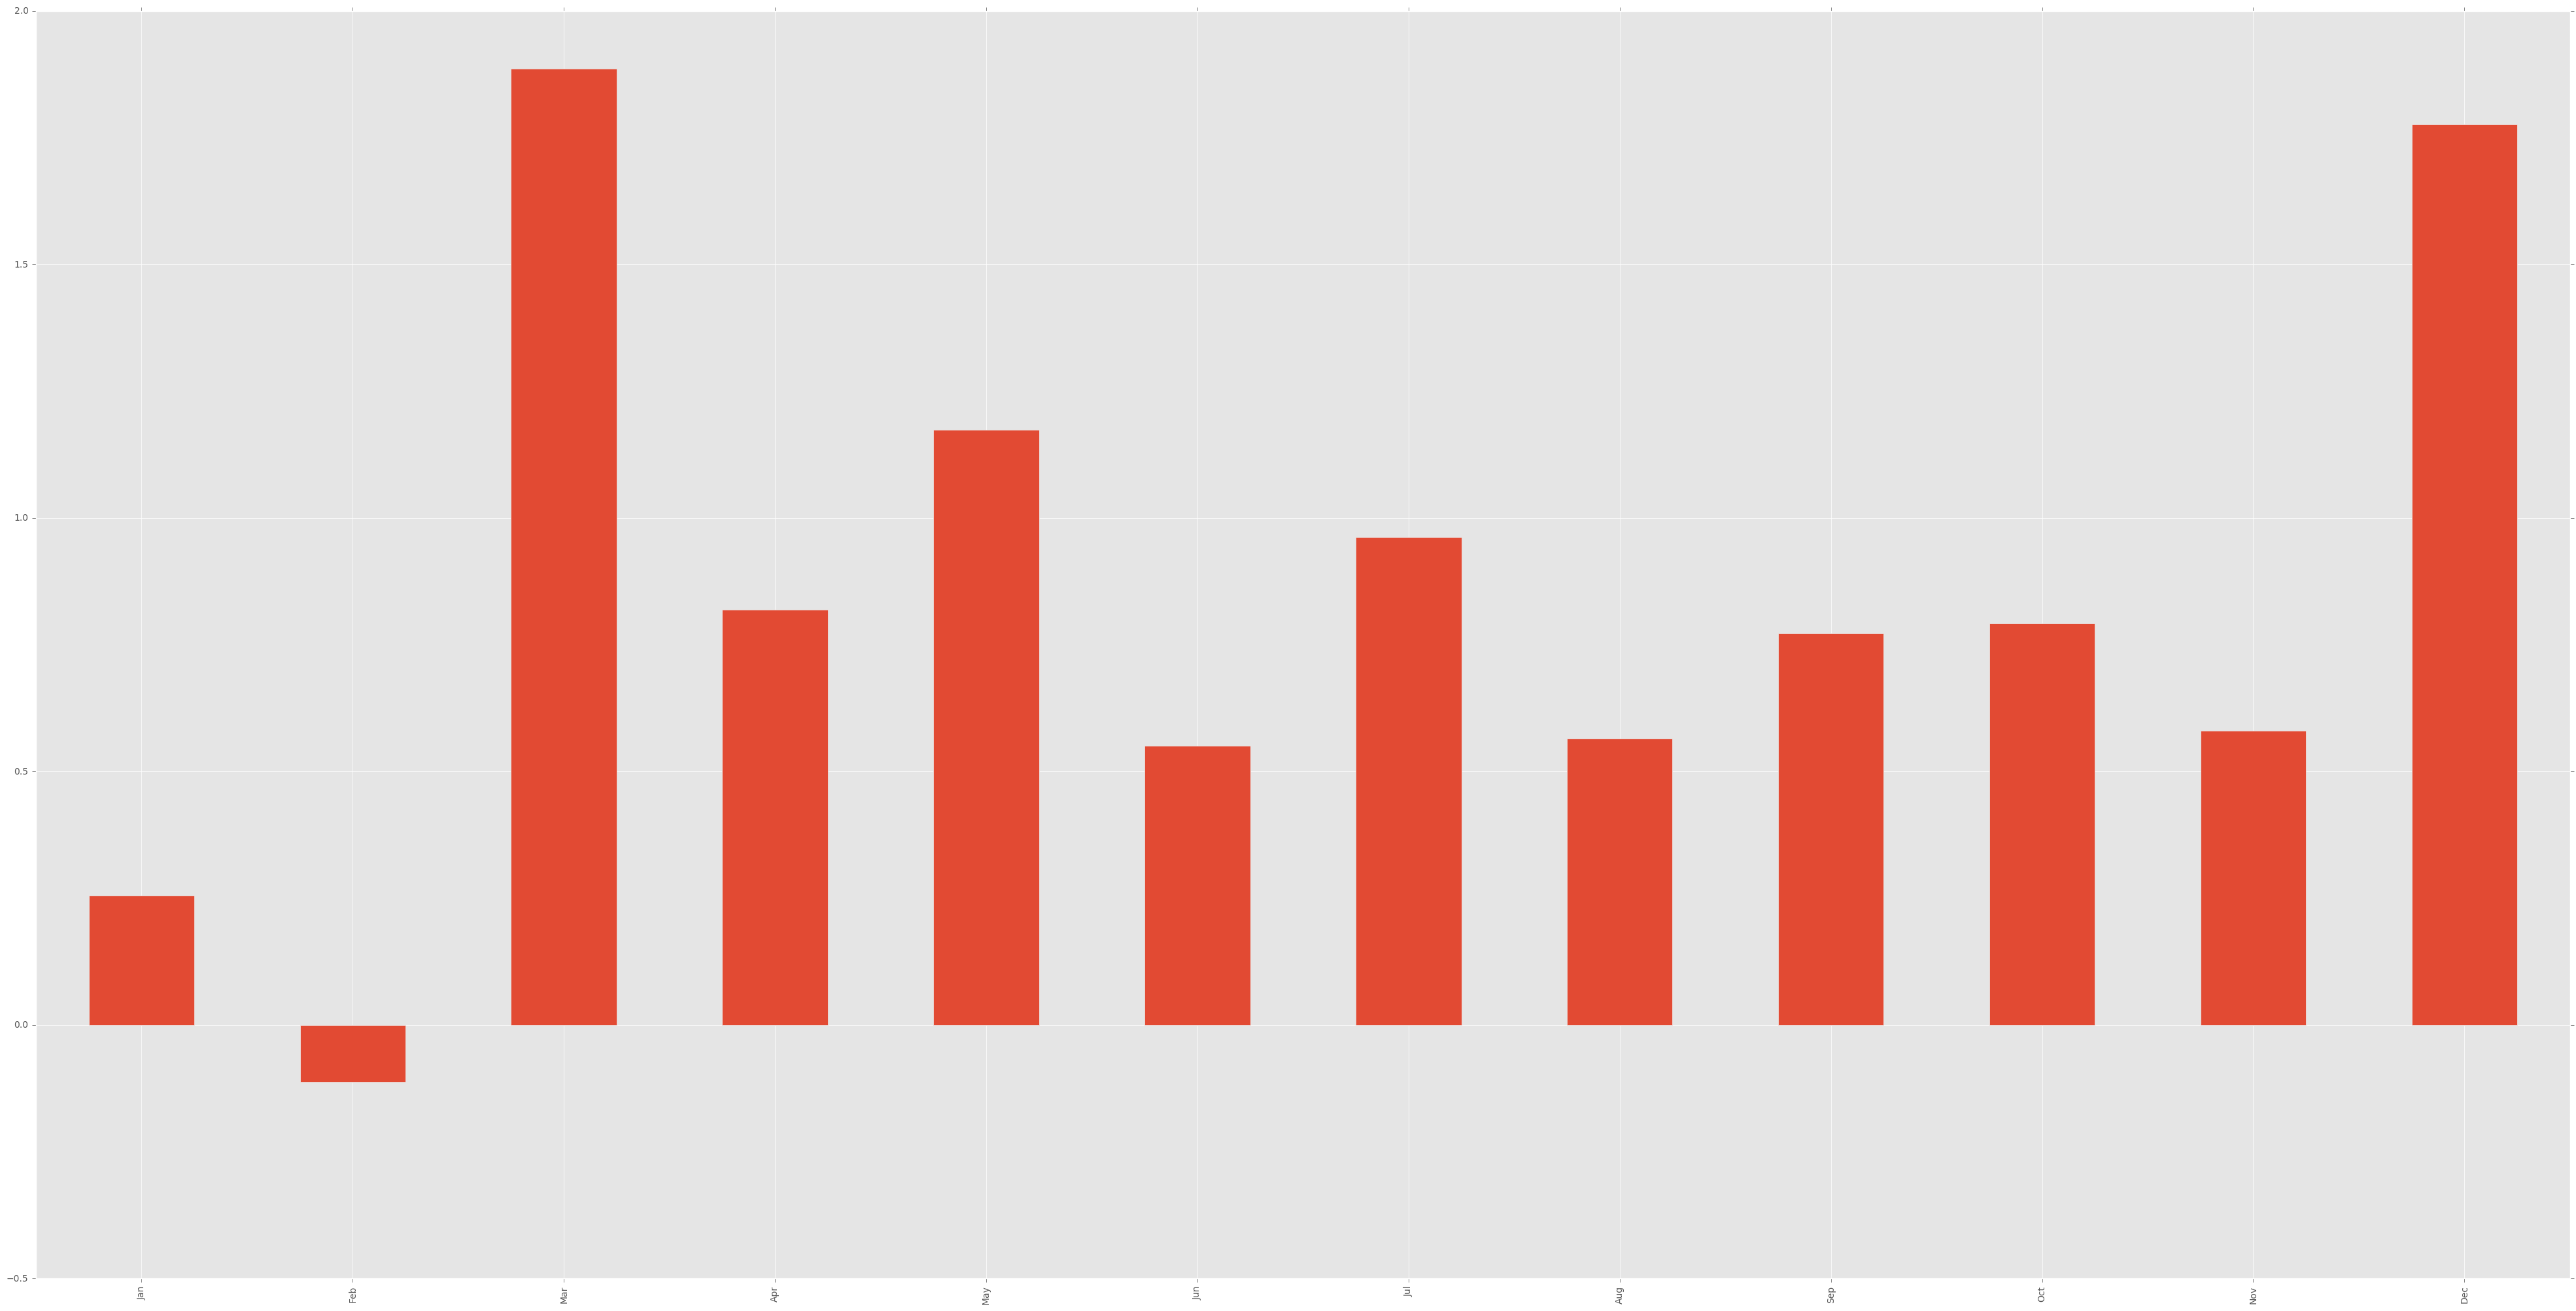

In [67]:
ax = bang_tran['difference_temp'].plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

In [ ]:
Task 3 - Visualization
matplotlib
Make a histogram for a particular month.
Compare distributions for 2 months (histograms on subplots).
Compare two years in the same histogram (use color coding).
Define a function to compare two months in the same frame.
Create a box plot for 1 month.
Create a box plot for 2 months on 1 figure.
Create a function that compares 2 months via boxplot.


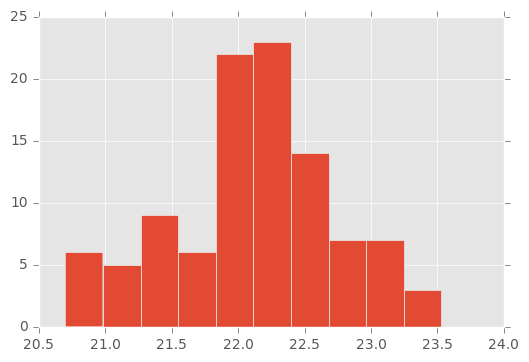

In [75]:
bang['Jan'].hist()

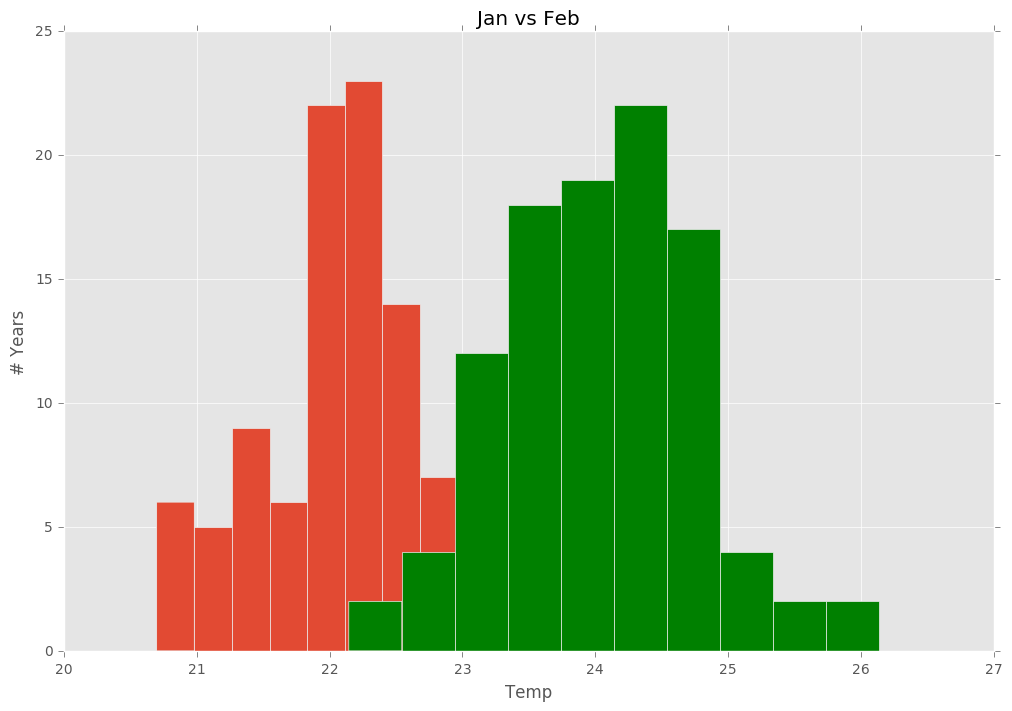

In [82]:
f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
bang.hist(column='Jan', ax=ax1);
bang.hist(column='Feb', color='green', ax=ax1);
plt.xlabel('Temp')
plt.ylabel('# Years')
plt.title("Jan vs Feb")

In [94]:
def compare_months(first_month, second_month):
    f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    bang.hist(column=first_month,  ax=ax1);
    bang.hist(column=second_month, color='green', ax=ax1);
    plt.xlabel('Temp')
    plt.ylabel('# Years')
    plt.title(first_month+ " vs " + second_month)

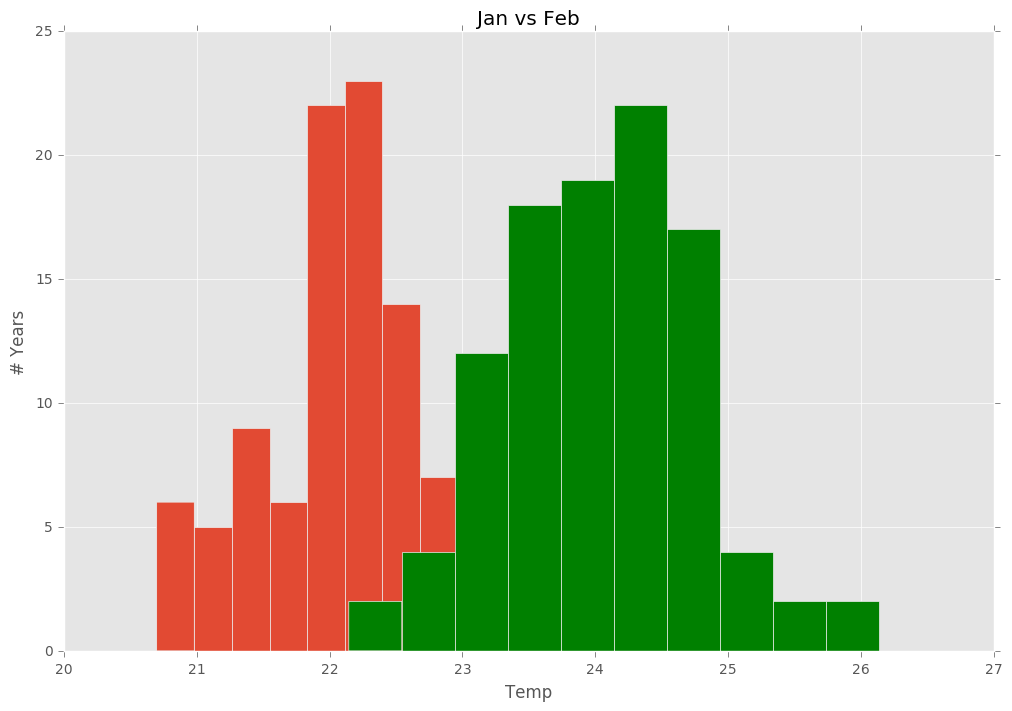

In [95]:
compare_months("Jan", "Feb")

/Users/dancardella/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x1297d9668>],
 'caps': [<matplotlib.lines.Line2D at 0x1297e0ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1297eb8d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1297e49e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1297d9f98>,
  <matplotlib.lines.Line2D at 0x1297e07f0>]}

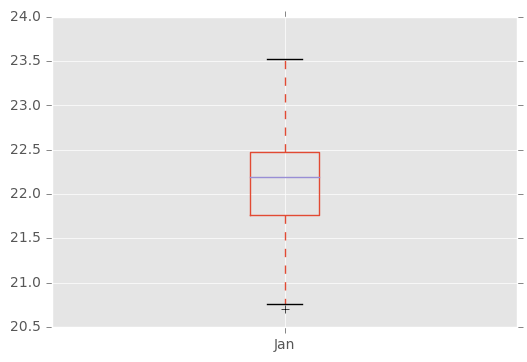

In [100]:

bang.boxplot(column= "Jan")

/Users/dancardella/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x12a1c97b8>,
 'caps': [<matplotlib.lines.Line2D at 0x12a1d1ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12a1dca20>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12a1d8b38>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12a1c9a58>,
  <matplotlib.lines.Line2D at 0x12a1e2be0>]}

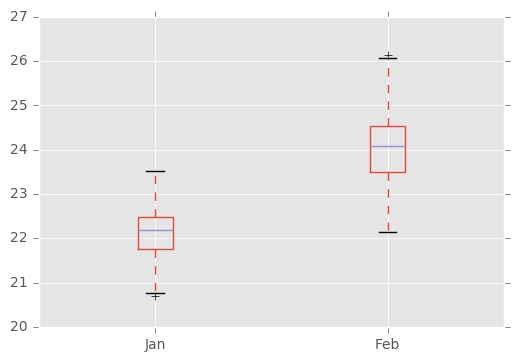

In [105]:
bang.boxplot(column= ["Jan",'Feb'])


/Users/dancardella/anaconda/envs/py3k/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


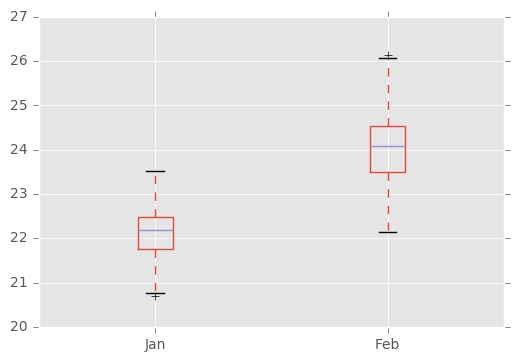

In [107]:
def compare_boxplots (first_month, second_month):
    bang.boxplot(column= [first_month,second_month])

compare_boxplots("Jan", "Feb")
    

In [109]:
## Needing to install package ... heading to do that now 
import seaborn as sns


ImportError: No module named 'seaborn'